## TIME SERIES FORECASTING

In [40]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot as plt

In [41]:
def parser(x):
    return datetime.strptime(x,'%Y-%m-%d')
energy = pd.read_csv("C:/Users/Amit/Desktop/MS in Data Science/Sem4/Seminar Topics 672/Project/Dataset/energy.csv",parse_dates=[1],date_parser=parser)

In [42]:
energy_df = energy

In [44]:
energy.head(4)

,s,day,LCLid,energy_median,energy_mean,energy_max,energy_min,energy_sum
0,0,2012-10-12,MAC000002,0.1385,0.154304,0.886,0.000,7.098
1,1,2012-10-13,MAC000002,0.1800,0.230979,0.933,0.076,11.087
2,2,2012-10-14,MAC000002,0.1580,0.275479,1.085,0.070,13.223
3,3,2012-10-15,MAC000002,0.1310,0.213688,1.164,0.070,10.257


In [45]:
energy.day[1]

Timestamp('2012-10-13 00:00:00')

In [46]:
housecount = energy.groupby("day")[["LCLid"]].nunique()
housecount.head(4)

,LCLid
day,
2011-11-23,13
2011-11-24,25
2011-11-25,32
2011-11-26,41


In [47]:
housecount

,LCLid
day,
2011-11-23,13
2011-11-24,25
2011-11-25,32
2011-11-26,41
2011-11-27,41
2011-11-28,55
2011-11-29,63
2011-11-30,76
2011-12-01,92


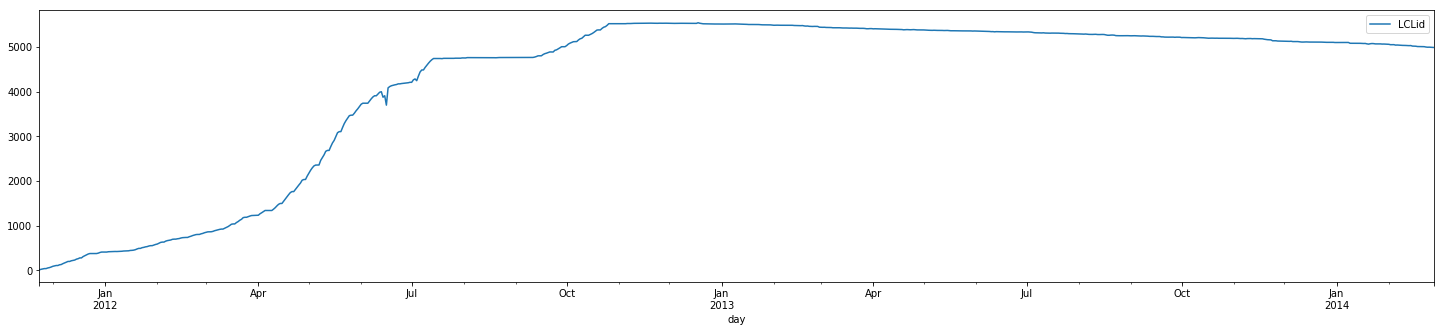

In [48]:
housecount.plot(figsize=(25,5))

In [49]:
energy = energy.groupby('day')[['energy_sum']].sum()

In [50]:
energy

,energy_sum
day,
2011-11-23,90.385000
2011-11-24,213.412000
2011-11-25,303.993000
2011-11-26,420.976000
2011-11-27,444.883001
2011-11-28,500.686000
2011-11-29,584.317001
2011-11-30,669.827000
2011-12-01,848.949001


In [51]:
energy = energy.merge(housecount,on=['day'])
energy = energy.reset_index()

In [52]:
energy

,day,energy_sum,LCLid
0,2011-11-23,90.385000,13
1,2011-11-24,213.412000,25
2,2011-11-25,303.993000,32
3,2011-11-26,420.976000,41
4,2011-11-27,444.883001,41
5,2011-11-28,500.686000,55
6,2011-11-29,584.317001,63
7,2011-11-30,669.827000,76
8,2011-12-01,848.949001,92
9,2011-12-02,1014.591001,100


In [54]:
energy

,day,energy_sum,LCLid,avg_energy
0,2011-11-23,90.385000,13,6.952692
1,2011-11-24,213.412000,25,8.536480
2,2011-11-25,303.993000,32,9.499781
3,2011-11-26,420.976000,41,10.267707
4,2011-11-27,444.883001,41,10.850805
5,2011-11-28,500.686000,55,9.103382
6,2011-11-29,584.317001,63,9.274873
7,2011-11-30,669.827000,76,8.813513
8,2011-12-01,848.949001,92,9.227707
9,2011-12-02,1014.591001,100,10.145910


In [53]:
energy['avg_energy'] =  energy['energy_sum']/energy['LCLid']
print("Starting Point of Data at Day Level",min(energy.day))
print("Ending Point of Data at Day Level",max(energy.day))

Starting Point of Data at Day Level 2011-11-23 00:00:00
Ending Point of Data at Day Level 2014-02-28 00:00:00


In [55]:
energy = energy[['day','avg_energy']]

In [56]:
energy

,day,avg_energy
0,2011-11-23,6.952692
1,2011-11-24,8.536480
2,2011-11-25,9.499781
3,2011-11-26,10.267707
4,2011-11-27,10.850805
5,2011-11-28,9.103382
6,2011-11-29,9.274873
7,2011-11-30,8.813513
8,2011-12-01,9.227707
9,2011-12-02,10.145910


In [57]:
energy_yz = energy.set_index('day')

In [58]:
energy_yz

,avg_energy
day,
2011-11-23,6.952692
2011-11-24,8.536480
2011-11-25,9.499781
2011-11-26,10.267707
2011-11-27,10.850805
2011-11-28,9.103382
2011-11-29,9.274873
2011-11-30,8.813513
2011-12-01,9.227707


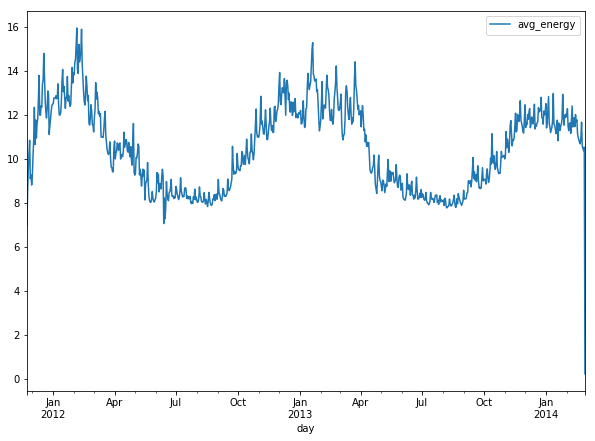

In [149]:
energy_yz.plot(figsize = (10,7))

In [208]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 432x288 with 0 Axes>

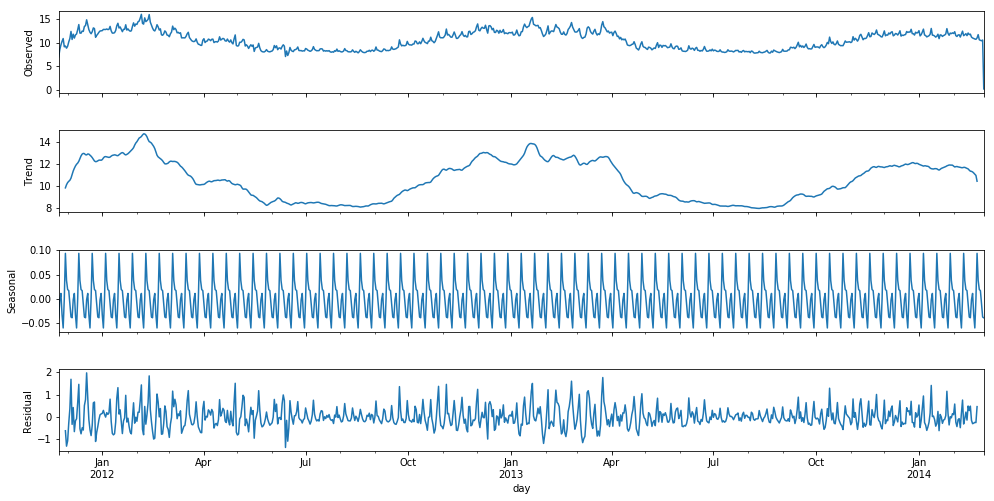

In [209]:
de = seasonal_decompose(energy_yz.avg_energy,freq=12)
fig = plt.figure()  
fig = de.plot()  
fig.set_size_inches(15, 8)

## Stationarity
mean, variance and covariance is constant over the periods

In [212]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [213]:
test_stationarity(energy_yz)

AttributeError: module 'pandas' has no attribute 'rolling_mean'

## Converting series stationary

In [150]:
energy_yz.head()

,avg_energy
day,
2011-11-23,6.952692
2011-11-24,8.536480
2011-11-25,9.499781
2011-11-26,10.267707
2011-11-27,10.850805


In [151]:
from statsmodels.graphics.tsaplots import plot_acf

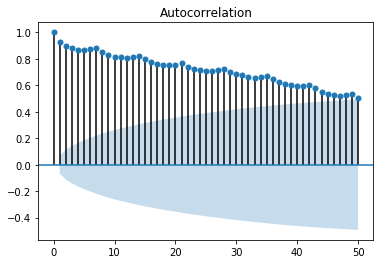

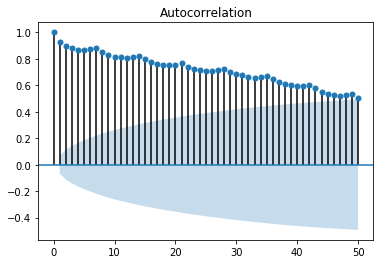

In [153]:
plot_acf(energy_yz,lags=50)

# energy_yz by integrating factor of 1, i.e d = 1

In [65]:
energy_yz_diff = energy_yz.diff(periods = 1)

In [67]:
energy_yz_diff = energy_yz_diff[1:]

In [68]:
energy_yz_diff

,avg_energy
day,
2011-11-24,1.583788
2011-11-25,0.963301
2011-11-26,0.767926
2011-11-27,0.583098
2011-11-28,-1.747423
2011-11-29,0.171491
2011-11-30,-0.461360
2011-12-01,0.414193
2011-12-02,0.918203


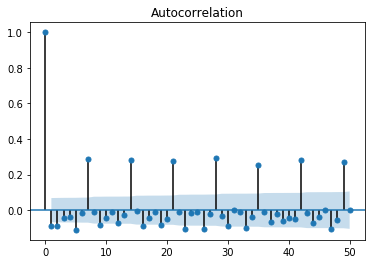

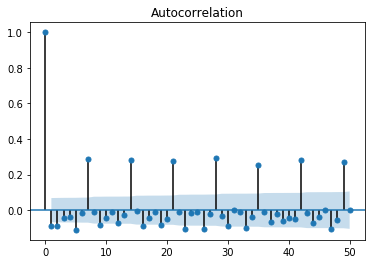

In [74]:
plot_acf(energy_yz_diff,lags= 50)

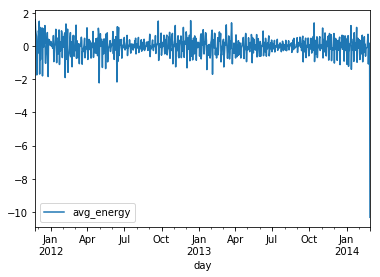

In [76]:
energy_yz_diff.plot()

## Divide data into train and test

In [132]:
X = energy_yz.values
train = X[0:738]  #738 for train
test = X[738:]    #90 for testing
predction = []

In [133]:
test.size

91

In [77]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [134]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [139]:
predictions = model_ar_fit.predict(start = 738,end = 828)

In [140]:
test

array([[11.71671476],
       [12.46528491],
       [11.43227443],
       [11.62398927],
       [11.56952097],
       [12.02300117],
       [11.80660078],
       [12.15904277],
       [12.29223375],
       [11.42326992],
       [11.58514822],
       [11.90931194],
       [11.8496974 ],
       [11.59276854],
       [11.95993349],
       [12.49133209],
       [11.36490292],
       [11.57371403],
       [11.49747632],
       [11.64509548],
       [11.69062199],
       [12.33760528],
       [12.13554161],
       [12.25025274],
       [12.194887  ],
       [12.80383911],
       [11.88653224],
       [11.86961462],
       [11.58435587],
       [12.18533921],
       [12.01117343],
       [12.10701667],
       [12.51607472],
       [11.41131268],
       [11.67083395],
       [12.21934301],
       [12.8388467 ],
       [11.61220682],
       [11.47524211],
       [11.19989176],
       [11.32236128],
       [11.44716706],
       [11.75713268],
       [12.98163486],
       [11.57114443],
       [11

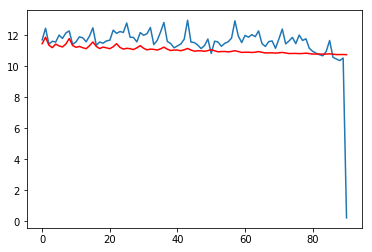

In [141]:
plt.plot(test)
plt.plot(predictions,color = 'red')

In [142]:
mean_squared_error(test,predictions)

1.8039900785376999

## ARIMA Model

In [154]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [204]:
model = SARIMAX(train, order=(7, 1, 1), seasonal_order=(1,1,0,12), h = 738)

In [205]:
model_fit = model.fit(disp=False)

In [206]:
yhat = model_fit.predict(start = len(train)-1,end = len(train)+len(test))
print(yhat)

[11.80231821 11.19374174 11.69219994 11.99306544 12.18202898 11.88077794
 11.55576863 11.39355123 11.43990061 11.7458814  11.68198267 11.74079607
 11.79593897 11.20741022 11.39818282 12.12907456 12.35985121 12.157464
 12.08416916 12.20432587 11.6529673  11.69232589 11.71478407 11.7645464
 11.79324727 11.47813709 11.73139882 12.1547544  12.3398007  12.1600789
 12.05263612 12.0628065  11.79601193 11.90852013 11.82445518 11.86152005
 11.94667154 11.55325141 11.80258086 12.37239873 12.54036753 12.30626067
 12.20309298 12.29420552 11.92254397 12.01970931 11.98556645 12.0029849
 12.03066326 11.66680778 11.9331085  12.45417365 12.64675341 12.43889052
 12.31684166 12.34766325 12.02129017 12.13486915 12.09186787 12.13076295
 12.18754502 11.79816544 12.04284917 12.5827906  12.76791351 12.55741655
 12.45309782 12.51501341 12.15914079 12.25573305 12.21296803 12.24378242
 12.29276187 11.92199456 12.1784652  12.70473754 12.88781986 12.67554822
 12.56375814 12.61443461 12.27741013 12.38343213 12.3379

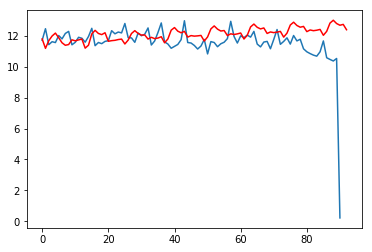

In [207]:
plt.plot(test)
plt.plot(yhat,color = 'red')

In [203]:
print(model_fit.aic)

1180.918852439128


In [100]:
from statsmodels.tsa.arima_model import ARIMA

In [201]:
model_arima = ARIMA(train,order = (7,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

920.8987426204972


AttributeError: 'ARIMA' object has no attribute 'fittedvalues'

In [193]:
predictions = auto.arima()
predictions

NameError: name 'auto' is not defined

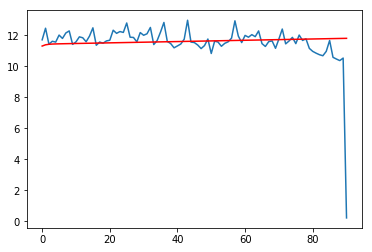

In [202]:
plt.plot(test)
plt.plot(predictions,color = 'red')

In [117]:
import itertools
p = d = q = range(0,5)

In [118]:
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [121]:
for param in pdq:
    try:
        model_arima = ARIMA(train,order = param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 1131.8501687523892
(0, 0, 1) 1122.722973672746
(0, 0, 2) 1088.046589923552
(0, 0, 3) 1079.292272089675
(0, 0, 4) 1076.8799677630186
(0, 1, 0) 1708.1306447877478
(0, 1, 1) 1139.861475546495
(0, 2, 0) 2508.182888201775
(0, 2, 1) 1715.3898941604841
(1, 0, 0) 1126.2507226630235
(1, 0, 1) 1084.1859245388546
(1, 0, 2) 1079.3668804811962
(1, 0, 3) 1080.2228483436481
(1, 0, 4) 1081.345031709857
(1, 1, 0) 1511.2288004631769
(1, 1, 1) 1134.4578907886967
(1, 2, 0) 2103.824644811398


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(1, 2, 3) 1115.6172310156048
(2, 0, 0) 1112.5759765382704
(2, 0, 1) 1077.4169452731935
(2, 0, 2) 1017.3690590057181
(2, 0, 3) 951.6842414377293
(2, 0, 4) 949.2176128493829
(2, 1, 0) 1412.5690432266692
(2, 1, 1) 1121.0753656231636
(2, 1, 2) 1086.9698403367952
(2, 2, 0) 1873.720673517676


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(2, 2, 4) 1119.996420277829
(3, 0, 0) 1103.9420182729805
(3, 0, 1) 1074.2313818256148
(3, 0, 2) 971.273571364407
(3, 0, 3) 997.979605772309
(3, 0, 4) 944.0097510109883
(3, 1, 0) 1373.5656355442493
(3, 1, 1) 1112.6919277524544
(3, 1, 2) 1081.1053688126538


C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(3, 1, 3) 1087.967130577434
(3, 2, 0) 1741.3308047630917
(4, 0, 0) 1080.1361154614008
(4, 0, 1) 1059.7051479658521
(4, 0, 2) 943.1041531118392
(4, 0, 3) 945.1004510718133
(4, 0, 4) 945.8574234486332
(4, 1, 0) 1350.5545365782684
(4, 1, 1) 1089.2908309296008
(4, 1, 2) 1101.459278137676
(4, 2, 0) 1683.9492841054923
(4, 2, 1) 1360.4044790247076
